<a href="https://colab.research.google.com/github/wmishie/DataAnalysis/blob/main/Recipe_Generation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
recipes=pd.read_csv('/content/drive/MyDrive/cleaned.csv')

In [ ]:
recipes.dropna(inplace=True)

In [ ]:
recipes.columns

Index(['Foods', 'Recipes', 'Instructions'], dtype='object')

In [ ]:
recipes.head()

,Foods,Recipes,Instructions
0,Slow Cooker Chicken and Dumplings,"['4 skinless, boneless chicken breast halves A...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,['2 (10.75 ounce) cans condensed cream of mush...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"['1/2 cup packed brown sugar ADVERTISEMENT', '...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"['1 cup butter, softened ADVERTISEMENT', '1 cu...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,['8 ounces whole wheat rotini pasta ADVERTISEM...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Splitting the dataset
train_data, test_data = train_test_split(recipes, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)


In [ ]:
# Splitting the dataset
train_data, test_data = train_test_split(recipes, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)


In [ ]:
# Saving the split datasets to CSV (optional)
train_data.to_csv('/content/drive/MyDrive/train_data.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/val_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/test_data.csv', index=False)


In [ ]:
STOP_WORD_Foods = '📗 '
STOP_WORD_Recipes = '\n🥕\n\n'
STOP_WORD_Instructions = '\n📝\n\n'

In [ ]:
# Function definition
def recipe_to_string(recipe):
    noize_string = 'ADVERTISEMENT'  # Example noise string to be removed from the text

    # Check if the keys exist before accessing them and provide default values if they don't
    title = recipe.get('Foods', '')  # Use .get() with a default value to handle missing keys
    ingredients = recipe.get('Recipes', '')
    instructions = recipe.get('Instructions', '').split('\n')

    # Initialize an empty string to accumulate the ingredients
    ingredients_string = ''
    for ingredient in ingredients.split(','):
        ingredient = ingredient.replace(noize_string, '')  # Remove the noise string from the ingredient
        if ingredient.strip():
            ingredients_string += f'• {ingredient.strip()}\n'  # Add formatted ingredient to the string

    # Initialize an empty string to accumulate the instructions
    instructions_string = ''
    for instruction in instructions:
        instruction = instruction.replace(noize_string, '')  # Remove the noise string from the instruction
        if instruction.strip():
            instructions_string += f'▪︎ {instruction.strip()}\n'  # Add formatted instruction to the string

    # Use title from the recipe dictionary and concatenate all parts into one string
    return f'{STOP_WORD_Foods}{title}{STOP_WORD_Recipes}{ingredients_string}{STOP_WORD_Instructions}{instructions_string}'

# Apply the function to each row of the DataFrame
dataset_stringified = [recipe_to_string(recipe) for _, recipe in recipes.iterrows()]

# Print the first few processed recipes to verify
for recipe_str in dataset_stringified[:5]:
    print(recipe_str)

📗 Slow Cooker Chicken and Dumplings
🥕

• ['4 skinless
• boneless chicken breast halves '
• '2 tablespoons butter '
• '2 (10.75 ounce) cans condensed cream of chicken soup '
• '1 onion
• finely diced '
• '2 (10 ounce) packages refrigerated biscuit dough
• torn into pieces '
• '']

📝

▪︎ Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.
▪︎ Cover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.

📗 Awesome Slow Cooker Pot Roast
🥕

• ['2 (10.75 ounce) cans condensed cream of mushroom soup '
• '1 (1 ounce) package dry onion soup mix '
• '1 1/4 cups water '
• '5 1/2 pounds pot roast '
• '']

📝

▪︎ In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.
▪︎ Cook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.

📗 Brown Sugar Meat

In [ ]:
# Iterate over the rows of the DataFrame instead of column names
dataset_stringified = [recipe_to_string(recipe) for _, recipe in recipes.iterrows()]

In [ ]:
for recipe_index, recipe_string in enumerate(dataset_stringified[:10]):
    print('Recipe #{}\n---------'.format(recipe_index + 1))
    print(recipe_string)
    print('\n')

Recipe #1
---------
📗 Slow Cooker Chicken and Dumplings
🥕

• ['4 skinless
• boneless chicken breast halves '
• '2 tablespoons butter '
• '2 (10.75 ounce) cans condensed cream of chicken soup '
• '1 onion
• finely diced '
• '2 (10 ounce) packages refrigerated biscuit dough
• torn into pieces '
• '']

📝

▪︎ Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.
▪︎ Cover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.



Recipe #2
---------
📗 Awesome Slow Cooker Pot Roast
🥕

• ['2 (10.75 ounce) cans condensed cream of mushroom soup '
• '1 (1 ounce) package dry onion soup mix '
• '1 1/4 cups water '
• '5 1/2 pounds pot roast '
• '']

📝

▪︎ In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.
▪︎ Cook on High setting for 3 to 4 hours, or on Low set

In [ ]:
print(dataset_stringified[500])

📗 Honey Mustard Dressing II
🥕

• ['1/4 cup mayonnaise '
• '1 tablespoon prepared mustard '
• '1 tablespoon honey '
• '1/2 tablespoon lemon juice '
• '']

📝

▪︎ In a small bowl, whisk together the mayonnaise, mustard, honey, and lemon juice. Store covered in the refrigerator.



In [ ]:
recipes_lengths = []
for recipe_text in dataset_stringified:
    recipes_lengths.append(len(recipe_text))

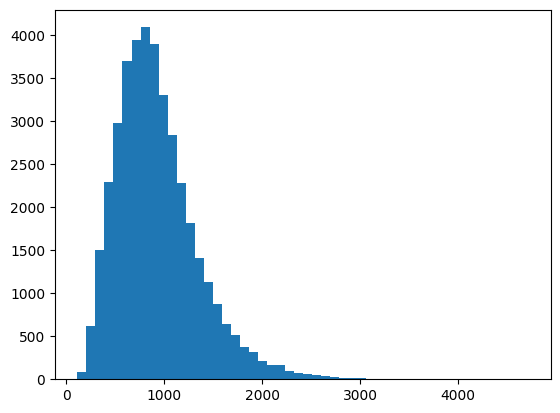

In [ ]:
import matplotlib.pyplot as plt
plt.hist(recipes_lengths, bins=50)
plt.show()

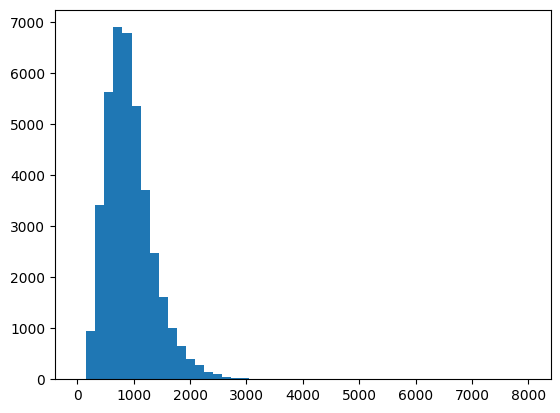

In [ ]:
plt.hist(recipes_lengths, range=(0, 8000), bins=50)
plt.show()

In [ ]:
# Concatenate Foods, Ingredients, and Instructions with stop words
recipes['full_text'] = recipes['Foods'] + STOP_WORD_Foods + recipes['Recipes'] + STOP_WORD_Recipes + recipes['Instructions'] + STOP_WORD_Instructions

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(recipes['full_text'])
total_words = len(tokenizer.word_index) + 1

In [ ]:
# Create input sequences using tokenizer
input_sequences = tokenizer.texts_to_sequences(recipes['full_text'])


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import the pad_sequences function

# Pad sequences to ensure uniform length
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='post')

In [ ]:
# Prepare X (input) and y (target) for training
X = input_sequences[:, :-1]  # All but the last token
y = input_sequences[:, 1:]   # All but the first token


In [ ]:
# Create TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [ ]:
# Define hyperparameters
embedding_dim = 100
max_sequence_len = X.shape[1]  # Length of input sequences

# Define the model architecture
model = Sequential([
    Embedding(total_words, embedding_dim, input_length=max_sequence_len),
    LSTM(150, return_sequences=True),
    Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Define hyperparameters
embedding_dim = 100
max_sequence_len = X.shape[1]  # Length of input sequences

# Define the model architecture
model = Sequential([
    Embedding(total_words, embedding_dim, input_length=max_sequence_len),
    LSTM(150, return_sequences=True),
    Dense(total_words, activation='softmax') # This layer is causing the issue
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reduce the batch size
batch_size = 32  # Reduced from 64
epochs = 10

# Train the model
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
989/989 [==============================] - 658s 663ms/step - loss: 1.4653 - accuracy: 0.8154 - val_loss: 1.0170 - val_accuracy: 0.8322
Epoch 2/10
989/989 [==============================] - 639s 647ms/step - loss: 0.7706 - accuracy: 0.8622 - val_loss: 0.7531 - val_accuracy: 0.8659
Epoch 3/10
989/989 [==============================] - 626s 633ms/step - loss: 0.6145 - accuracy: 0.8824 - val_loss: 0.6652 - val_accuracy: 0.8768
Epoch 4/10
989/989 [==============================] - 623s 630ms/step - loss: 0.5522 - accuracy: 0.8899 - val_loss: 0.6203 - val_accuracy: 0.8818
Epoch 5/10
989/989 [==============================] - 624s 631ms/step - loss: 0.5190 - accuracy: 0.8939 - val_loss: 0.5949 - val_accuracy: 0.8846
Epoch 6/10
989/989 [==============================] - 637s 644ms/step - loss: 0.4974 - accuracy: 0.8965 - val_loss: 0.5766 - val_accuracy: 0.8869
Epoch 7/10
989/989 [==============================] - 625s 632ms/step - loss: 0.4816 - accuracy: 0.8984 - val_loss: 0.5633 -

In [ ]:
# Assuming x_test and y_test are your test datasets
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


In [ ]:
model.save('/content/drive/MyDrive/trained_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/trained_model.keras')

# Example of using the loaded model (for inference or further training)
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



OSError: No file or directory found at /content/drive/MyDrive/trained_model.keras

In [ ]:
import pandas as pd

def load_test_data(file_path):
  """
  Loads test data from a CSV file and returns features and labels.

  Args:
    file_path: Path to the CSV file containing test data.

  Returns:
    A tuple containing (x_test, y_test), where x_test is the test features
    and y_test is the corresponding labels.
  """
  test_data = pd.read_csv(file_path)
  # Assuming the last column contains labels and the rest are features
  x_test = test_data.iloc[:, :-1].values
  y_test = test_data.iloc[:, -1].values

  # Convert string labels to numerical representations (if needed)
  # Assuming y_test contains string labels, replace with appropriate encoding
  from sklearn.preprocessing import LabelEncoder
  label_encoder = LabelEncoder()
  y_test = label_encoder.fit_transform(y_test)

  return x_test, y_test

# Load the test data
x_test, y_test = load_test_data('/content/drive/MyDrive/test_data.csv')

# Ensure x_test and y_test are appropriately prepared
# ... (code to preprocess x_test if needed)



In [ ]:
# Assuming new_ingredients is your new input data
new_ingredients = ["rice,chicken,garlic"]
new_sequences_ing = tokenizer_ing.texts_to_sequences(new_ingredients)
new_padded_ing = pad_sequences(new_sequences_ing, maxlen=max_seq_length, padding='post')

# Generate prediction
predicted_instructions = loaded_model.predict(new_padded_ing)
print(predicted_instructions)


UnimplementedError: Graph execution error:

Detected at node sequential_5/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-70-3a5abe403053>", line 43, in <cell line: 43>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 654, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 751, in _conform_to_reference_input

2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node sequential_5/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_71889]